In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip gdrive/MyDrive/Fertilizers_Recommendation_\ System_For_Disease_\ Prediction.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8914e04-4e33-4189-bfa9-f547e5f696d1___GCREC_Bact.Sp 3173.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a64b79-e21e-4158-9d9d-47bd6e44fba0___GCREC_Bact.Sp 3594.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a90b81-eb30-461d-80ba-4fa9c93f379d___GCREC_Bact.Sp 3757.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8b6f17a-5189-47ae-904f-be4a09dce0ad___UF.GRC_BS_Lab Leaf 9009.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d2baf6-87de-43e5-bd40-48dfe33841d3___GCREC_Bact.Sp 5747.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d3c759-4242-42c0-9be5-b3177f2664be___GCREC_Bact.Sp 5953.JPG  
  

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
path_train = 'Dataset Plant Disease/fruit-dataset/fruit-dataset/train'
path_test = 'Dataset Plant Disease/fruit-dataset/fruit-dataset/test'

In [6]:
x_train=train_datagen.flow_from_directory(path_train,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)
x_test=test_datagen.flow_from_directory(path_test,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 6)                 906       
                                                        

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [12]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 167s 736ms/step - loss: 1.0570 - accuracy: 0.7721 - val_loss: 0.2213 - val_accuracy: 0.9282
Epoch 2/10
225/225 [==============================] - 165s 735ms/step - loss: 0.2463 - accuracy: 0.9164 - val_loss: 0.2280 - val_accuracy: 0.9223
Epoch 3/10
225/225 [==============================] - 161s 717ms/step - loss: 0.2084 - accuracy: 0.9311 - val_loss: 0.2218 - val_accuracy: 0.9365
Epoch 4/10
225/225 [==============================] - 166s 737ms/step - loss: 0.1648 - accuracy: 0.9406 - val_loss: 0.3181 - val_accuracy: 0.9063
Epoch 5/10
225/225 [==============================] - 166s 735ms/step - loss: 0.1455 - accuracy: 0.9512 - val_loss: 0.1697 - val_accuracy: 0.9419
Epoch 6/10
225/225 [==============================] - 163s 722ms/step - loss: 0.1178 - accuracy: 0.9606 - val_loss: 0.1058 - val_accuracy: 0.9668
Epoch 7/10
225/225 [==============================] - 167s 741ms/step - loss: 0.1065 - accuracy: 0.9643 - val_loss: 0.0975 -

In [11]:
model.save('fruitdata.h5')

In [13]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [14]:
model=load_model('fruitdata.h5')

In [16]:
img=image.load_img('/content/Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Apple___healthy/1141dcab-cf2a-40e4-8b19-a33aa318f875___RS_HL 5689.JPG')

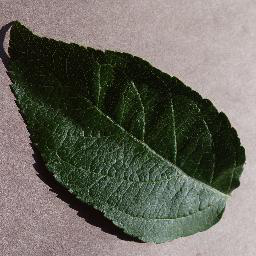

In [17]:
img

In [18]:
img=image.load_img('/content/Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Apple___healthy/1141dcab-cf2a-40e4-8b19-a33aa318f875___RS_HL 5689.JPG',target_size = (128,128))

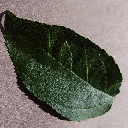

In [19]:
img

In [20]:
x = image.img_to_array(img)

In [21]:
x

array([[[143., 125., 125.],
        [139., 121., 121.],
        [143., 125., 125.],
        ...,
        [191., 180., 178.],
        [188., 177., 175.],
        [191., 180., 178.]],

       [[111.,  93.,  93.],
        [145., 127., 127.],
        [146., 128., 128.],
        ...,
        [196., 185., 183.],
        [191., 180., 178.],
        [187., 176., 174.]],

       [[136., 118., 118.],
        [154., 136., 136.],
        [111.,  93.,  93.],
        ...,
        [197., 186., 184.],
        [195., 184., 182.],
        [196., 185., 183.]],

       ...,

       [[104.,  85.,  87.],
        [159., 140., 142.],
        [171., 152., 154.],
        ...,
        [205., 195., 194.],
        [206., 196., 195.],
        [207., 197., 196.]],

       [[150., 131., 133.],
        [158., 139., 141.],
        [181., 162., 164.],
        ...,
        [212., 202., 201.],
        [193., 183., 182.],
        [204., 194., 193.]],

       [[161., 142., 144.],
        [185., 166., 168.],
        [161., 1

In [22]:
x = np.expand_dims(x,axis = 0)

In [23]:
x

array([[[[143., 125., 125.],
         [139., 121., 121.],
         [143., 125., 125.],
         ...,
         [191., 180., 178.],
         [188., 177., 175.],
         [191., 180., 178.]],

        [[111.,  93.,  93.],
         [145., 127., 127.],
         [146., 128., 128.],
         ...,
         [196., 185., 183.],
         [191., 180., 178.],
         [187., 176., 174.]],

        [[136., 118., 118.],
         [154., 136., 136.],
         [111.,  93.,  93.],
         ...,
         [197., 186., 184.],
         [195., 184., 182.],
         [196., 185., 183.]],

        ...,

        [[104.,  85.,  87.],
         [159., 140., 142.],
         [171., 152., 154.],
         ...,
         [205., 195., 194.],
         [206., 196., 195.],
         [207., 197., 196.]],

        [[150., 131., 133.],
         [158., 139., 141.],
         [181., 162., 164.],
         ...,
         [212., 202., 201.],
         [193., 183., 182.],
         [204., 194., 193.]],

        [[161., 142., 144.],
       